In [1]:
# imports the pcreode package
import pcreode
# matplotlib is a commonly used package for plotting
import matplotlib.pyplot as plt
# pandas is a package used for making the handling of large data sets easier 
import pandas as pd
# numpy is very common package for handling arrays and matrices
import numpy as np
# this line tells matplotlib to plot results inline with the current jupyter notebook
%matplotlib inline

In [2]:
m1_data = pd.read_csv( "../data/m1_adata.csv", header=None)
m2_data = pd.read_csv( "../data/m2_adata.csv", header=None)
m3_data = pd.read_csv( "../data/m3_adata.csv", header=None)
s1_data = pd.read_csv( "../data/s1_adata.csv", header=None)
s3_data = pd.read_csv( "../data/s3_adata.csv", header=None)

In [3]:
p1_data = pd.read_csv( "../data/s1_pan_c_all.csv", header=None)
p2_data = pd.read_csv( "../data/s2_pan_c_all.csv", header=None)

In [4]:
m1_labels = pd.read_excel( "../data/m1_names_final.xlsx", header=None)
m2_labels = pd.read_excel( "../data/m2_names_final.xlsx", header=None)
m3_labels = pd.read_excel( "../data/m3_names_final.xlsx", header=None)
s1_labels = pd.read_excel( "../data/s1_names_final.xlsx", header=None)
s3_labels = pd.read_excel( "../data/s3_names_final.xlsx", header=None)

In [5]:
p1_labels_1 = pd.read_csv( "../data/s1_pan_reduced.csv")
p2_labels_1 = pd.read_csv( "../data/s2_pan_reduced.csv")

In [6]:
p1_labels = pd.DataFrame( p1_labels_1.columns)
p2_labels = pd.DataFrame( p2_labels_1.columns)

In [7]:
print len( m1_labels)
print len( m2_labels)
print len( m3_labels)
print len( s1_labels)
print len( s3_labels)

print len( p1_labels)
print len( p2_labels)

379
247
311
415
407
74
56


In [8]:
combined_labels = m1_labels
combined_labels = combined_labels.append( m2_labels)
combined_labels = combined_labels.append( m3_labels)
combined_labels = combined_labels.append( s1_labels)
combined_labels = combined_labels.append( s3_labels)

combined_labels = combined_labels.append( p1_labels)
combined_labels = combined_labels.append( p2_labels)

In [9]:
combined_labels.shape

(1889, 1)

In [10]:
unique_labels = np.unique( combined_labels)
unique_labels.shape

(1141,)

In [11]:
# names samething as labels but refers to the complete set of names for data columns
m1_names = pd.read_excel( "../data/m1_names_fil.xlsx", header=None)
m2_names = pd.read_excel( "../data/m2_names_fil.xlsx", header=None)
m3_names = pd.read_excel( "../data/m3_names_fil.xlsx", header=None)
s1_names = pd.read_excel( "../data/s1_names_fil.xlsx", header=None)
s3_names = pd.read_excel( "../data/s3_names_fil.xlsx", header=None)

In [12]:
p1_names = pd.read_excel( "../data/mouse.xlsx", header=None)
p2_names = pd.read_excel( "../data/mouse.xlsx", header=None)

In [13]:
m1_data.columns = np.ravel( m1_names.values)
m2_data.columns = np.ravel( m2_names.values)
m3_data.columns = np.ravel( m3_names.values)
s1_data.columns = np.ravel( s1_names.values)
s3_data.columns = np.ravel( s3_names.values)

p1_data.columns = np.ravel( p1_names.values)
p2_data.columns = np.ravel( p2_names.values)

In [14]:
from functools import reduce
union_names = reduce(np.intersect1d, ( m1_names.values, m2_names.values, m3_names.values, s1_names.values, s3_names.values, p1_names.values, p2_names.values)).astype( str)
union_names

array(['0610007P14Rik', '0610009B22Rik', '0610009O20Rik', ..., 'Zzef1',
       'Zzz3', 'l7Rn6'], dtype='|S14')

In [15]:
unique_union = unique_labels[np.in1d( unique_labels, union_names)]
#unique_union

In [16]:
m1_reduced = pd.DataFrame( m1_data, columns=unique_union)
m2_reduced = pd.DataFrame( m2_data, columns=unique_union)
m3_reduced = pd.DataFrame( m3_data, columns=unique_union)
s1_reduced = pd.DataFrame( s1_data, columns=unique_union)
s3_reduced = pd.DataFrame( s3_data, columns=unique_union)

p1_reduced = pd.DataFrame( p1_data, columns=unique_union)
p2_reduced = pd.DataFrame( p2_data, columns=unique_union)

In [17]:
reduced_data_list = [m1_reduced, m2_reduced, m3_reduced, s1_reduced, s3_reduced, p1_reduced, p2_reduced]

In [18]:
print len( m1_labels[np.in1d( m1_labels, unique_union)])
print len( m2_labels[np.in1d( m2_labels, unique_union)])
print len( m3_labels[np.in1d( m3_labels, unique_union)])
print len( s1_labels[np.in1d( s1_labels, unique_union)])
print len( s3_labels[np.in1d( s3_labels, unique_union)])

print len( p1_labels[np.in1d( p1_labels, unique_union)])
print len( p2_labels[np.in1d( p2_labels, unique_union)])

298
225
276
401
398
32
26


In [19]:
all_reduced = np.vstack(( m1_reduced.values, m2_reduced.values, m3_reduced.values, s1_reduced.values, s3_reduced.values, p1_reduced.values, p2_reduced.values))

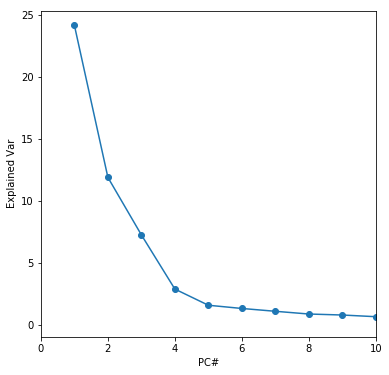

In [20]:
from sklearn.decomposition import PCA
all_pca = PCA( n_components=25)
all_pca.fit( all_reduced)
PCs = all_pca.explained_variance_ratio_ * 100

fig = plt.figure( figsize=(6,6))
ax = fig.add_subplot(111)
ax.set_xlabel( 'PC#')
ax.set_ylabel( 'Explained Var')
ax.set_xlim( 0,10)
_ = ax.plot( range( 1, all_pca.n_components+1), PCs, '-o')

In [21]:
m1_pca = all_pca.transform( m1_reduced)[:,:5]
m2_pca = all_pca.transform( m2_reduced)[:,:5]
m3_pca = all_pca.transform( m3_reduced)[:,:5]
s1_pca = all_pca.transform( s1_reduced)[:,:5]
s3_pca = all_pca.transform( s3_reduced)[:,:5]

p1_pca = all_pca.transform( p1_reduced)[:,:5]
p2_pca = all_pca.transform( p2_reduced)[:,:5]

In [22]:
pca_data_list = [m1_pca, m2_pca, m3_pca, s1_pca, s3_pca, p1_pca, p2_pca]

In [23]:
m1_path = "../graph_files/m1/"
m2_path = "../graph_files/m2/"
m3_path = "../graph_files/m3/"
s1_path = "../graph_files/s1/"
s3_path = "../graph_files/s3/"

p1_path = "../graph_files/pan1/"
p2_path = "../graph_files/pan2/"

In [24]:
file_paths = [m1_path, m2_path, m3_path, s1_path, s3_path, p1_path, p2_path]

(Text(0.5,0,'PC3'), Text(0,0.5,'PC1'))

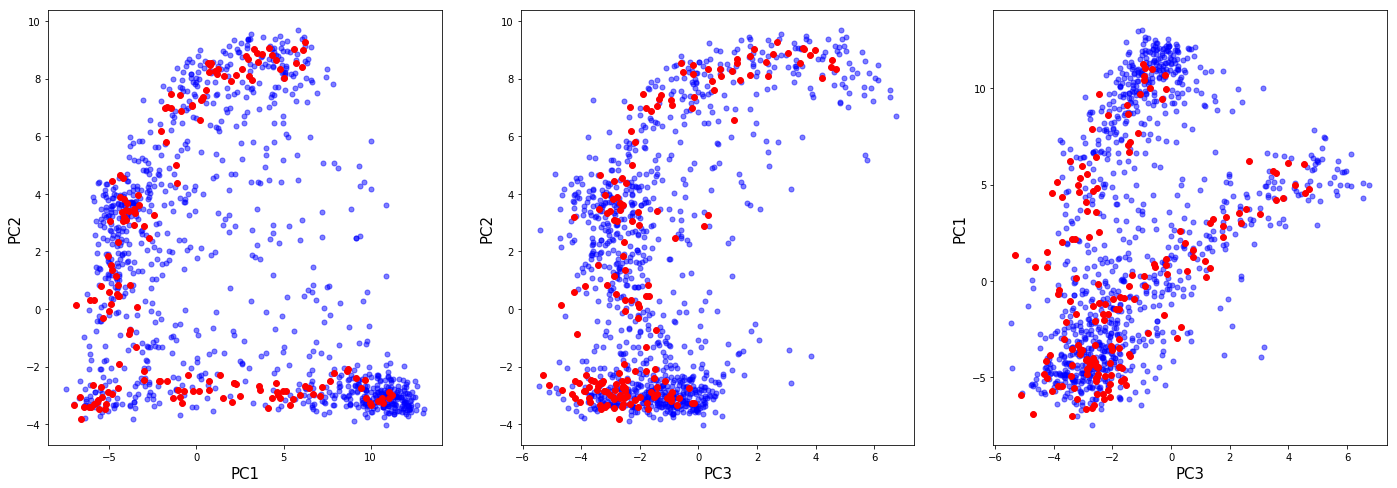

In [25]:
m1_ind  = np.genfromtxt( file_paths[0] + 'ind_{}.csv'.format( 0 ), delimiter=',').astype( int)
fig = plt.figure( figsize=(24,8))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
cc = 'blue'
al = 0.5
ax1.scatter( m1_pca[:,0], m1_pca[:,1], alpha=al, s=25, c=cc)
ax2.scatter( m1_pca[:,2], m1_pca[:,1], alpha=al, s=25, c=cc)
ax3.scatter( m1_pca[:,2], m1_pca[:,0], alpha=al, s=25, c=cc)
ax1.scatter( m1_pca[m1_ind,0], m1_pca[m1_ind,1], alpha=1, s=35, c='r')
ax2.scatter( m1_pca[m1_ind,2], m1_pca[m1_ind,1], alpha=1, s=35, c='r')
ax3.scatter( m1_pca[m1_ind,2], m1_pca[m1_ind,0], alpha=1, s=35, c='r')
ax1.set_xlabel("PC1", fontsize=15), ax1.set_ylabel("PC2", fontsize=15)
ax2.set_xlabel("PC3", fontsize=15), ax2.set_ylabel("PC2", fontsize=15)
ax3.set_xlabel("PC3", fontsize=15), ax3.set_ylabel("PC1", fontsize=15)

In [26]:
runs = 100
m1_gid = np.arange( 100)
m2_gid = np.arange( 100)
m3_gid = np.arange( 100)
s1_gid = np.arange( 100)
s3_gid = np.arange( 100)

p1_gid = np.arange( 100)
p2_gid = np.arange( 100)

In [27]:
gids = m1_gid
gids = np.append( gids, m2_gid)
gids = np.append( gids, m3_gid)
gids = np.append( gids, s1_gid)
gids = np.append( gids, s3_gid)

gids = np.append( gids, p1_gid)
gids = np.append( gids, p2_gid)

len( gids)

700

In [29]:
ids = np.array( [0]*len( m1_gid))
ids = np.append( ids, [1]*len( m1_gid))
ids = np.append( ids, [2]*len( m1_gid))
ids = np.append( ids, [3]*len( m1_gid))
ids = np.append( ids, [4]*len( m1_gid))

ids = np.append( ids, [5]*len( m1_gid))
ids = np.append( ids, [6]*len( m1_gid))

In [30]:
out_path = "../outputs/"

In [31]:
# function to create a distance matrix from graph space, must pass it a list of indices from downsampled data
def get_graph_distance_for_two( from_ind, to_ind, g_density):
    T = len( to_ind)
    F = len( from_ind)
    d = np.zeros( (  F, T))
    for ii in range( F):
        d[ii,:] = g_density.shortest_paths( from_ind[ii], to_ind, weights="weight")[0]
   
    return( d)

In [32]:
def point_line_seg( A, B, P):
    
    M = np.subtract( B, A)
    t = np.divide( np.dot( np.subtract( P, A), M), np.dot( M, M))
    
    if( t<=0):
        t_good = False
        d = np.linalg.norm( np.subtract( P, A))
    elif( t>=1):
        t_good = False
        d = np.linalg.norm( np.subtract( P, B))
    else:
        t_good = True
        d = np.linalg.norm( np.subtract( P, np.add( A, t*M)))
    
    return( d, t_good)

In [33]:
def get_x( ind_1, ind_2, dist_1, dist_2, dist, g_1, g_2, data1, data2):

    num_x = len( ind_1)
    branch_diff = 0.0
    dis_x = 0.0
    count = 0.0
    trans = 0.0
    g_dist = 0.0
    
    for ii in range( num_x-1):

        min_ind_ii = np.argmin( dist[ii,:])
        conn_ii    = g_2.neighbors(min_ind_ii)
        # need to find the closest line segment in graph B to node in graph A
        # need to loop over all neighbors
        min_dist_ii = 99999999999
        
        for cc in conn_ii:
            conn_dist_ii, conn_t_ii = point_line_seg( data2[min_ind_ii], data2[cc], data1[ii])
            if( conn_dist_ii<min_dist_ii):
                min_dist_ii = conn_dist_ii
                ls_ind_ii   = cc
                t_ii        = conn_t_ii
                
        for jj in range( ii+1, num_x):
            
            min_ind_jj = np.argmin( dist[jj,:])
            conn_jj    = g_2.neighbors(min_ind_jj)
            
            # need to find the closest line segment in graph B to node in graph A
            # need to loop over all neighbors
            min_dist_jj = 99999999999
            for hh in conn_jj:
                conn_dist_jj, conn_t_jj = point_line_seg( data2[min_ind_jj], data2[hh], data1[jj])
                if( conn_dist_jj<min_dist_jj):
                    min_dist_jj = conn_dist_jj
                    ls_ind_jj   = hh
                    t_jj        = conn_t_jj

            # need to get direction of graph pathing to calculate the graph distance
            g2_path_inds = g_2.get_all_shortest_paths( min_ind_ii, min_ind_jj)[0]
            
            
            # find if min_ind_ii line segment partner is in pathway node list
            if( np.all( (np.in1d( ls_ind_ii, g2_path_inds), conn_t_ii))):
                # if it is then graph distance will be
                trans_dist_ii = dist[ii,ls_ind_ii]**2
                trans_ind_ii  = ls_ind_ii
            elif( np.all( (np.in1d( ls_ind_ii, g2_path_inds, invert=True), conn_t_ii))):
                trans_dist_ii = dist[ii,min_ind_ii]**2
                trans_ind_ii  = min_ind_ii
            elif( conn_t_ii==False):
                trans_dist_ii = min_dist_ii
                trans_ind_ii  = min_ind_ii
               
            # find if min_ind_jj line segment partner is in pathway node list
            if( np.all( (np.in1d( ls_ind_jj, g2_path_inds), conn_t_jj))):
                # if it is then graph distance will be
                trans_dist_jj = dist[jj,ls_ind_jj]**2
                trans_ind_jj  = ls_ind_jj
            elif( np.all( (np.in1d( ls_ind_jj, g2_path_inds, invert=True), conn_t_jj))):
                trans_dist_jj = dist[jj,min_ind_jj]**2
                trans_ind_jj  = min_ind_jj
            elif( conn_t_jj==False):
                trans_dist_jj = min_dist_jj
                trans_ind_jj  = min_ind_jj
               
            
            deg_list_1 = np.transpose( g_1.degree())[g_1.get_all_shortest_paths( ii, jj)[0]]
            g1_branches = sum( deg_list_1[deg_list_1>2]) - 2 * len( deg_list_1[deg_list_1>2])
            
            deg_list_2 = np.transpose( g_2.degree())[g_2.get_all_shortest_paths( trans_ind_ii, trans_ind_jj)[0]]
            g2_branches = sum( deg_list_2[deg_list_2>2]) - 2 * len( deg_list_2[deg_list_2>2])
            
            branch_diff = branch_diff + abs( g1_branches - g2_branches)
            
            trans = trans + trans_dist_ii + trans_dist_jj
            
            g_dist = g_dist + abs( dist_1[ii,jj] - dist_2[trans_ind_ii,trans_ind_jj]) 
            
            dis_x = dis_x + abs( dist_1[ii,jj] - dist_2[trans_ind_ii,trans_ind_jj] + trans_dist_ii + trans_dist_jj)
            count = count + 1
            
    del min_dist_ii
    del min_ind_ii
    del min_dist_jj
    del min_ind_jj

    return( branch_diff/count, dis_x/count, count, trans/count, g_dist/count)

In [34]:
from sklearn.metrics import pairwise_distances
from igraph import *
import igraph

In [34]:
num_runs = len( gids)

br_diff_x = np.zeros( (num_runs, num_runs))
br_diff_y = np.zeros( (num_runs, num_runs))
diff_x    = np.zeros( (num_runs, num_runs))
diff_y    = np.zeros( (num_runs, num_runs))
br_x      = np.zeros( (num_runs, num_runs))
br_y      = np.zeros( (num_runs, num_runs))
counts_x  = np.zeros( (num_runs, num_runs))
counts_y  = np.zeros( (num_runs, num_runs))
trans_x  = np.zeros( (num_runs, num_runs))
trans_y  = np.zeros( (num_runs, num_runs))
g_dist_x  = np.zeros( (num_runs, num_runs))
g_dist_y  = np.zeros( (num_runs, num_runs))
#tr      = np.zeros( (num_runs, num_runs))
#Dist    = np.zeros( (num_runs, num_runs))
#g_dist  = np.zeros( (num_runs, num_runs))


counts   = np.zeros( (num_runs, num_runs))

for ss in range( num_runs-1):
        
    zz = gids[ss]
    data1 = pca_data_list[ids[ss]]
    print ss
    
    for tt in range( ss+1, num_runs):
        
        #print tt
        
        kk = gids[tt]
        #print kk
        data2 = pca_data_list[ids[tt]]
        
        ind_1  = np.genfromtxt( file_paths[ids[ss]] + 'ind_{}.csv'.format( zz), delimiter=',').astype( int)
        ind_2  = np.genfromtxt( file_paths[ids[tt]] + 'ind_{}.csv'.format( kk), delimiter=',').astype( int)
        
        adj_1  = pd.read_table( file_paths[ids[ss]] + 'adj_{}.txt'.format( zz), sep=" ", header=None).values
        adj_2  = pd.read_table( file_paths[ids[tt]] + 'adj_{}.txt'.format( kk), sep=" ", header=None).values
            
        dist_1a = pairwise_distances( data1[ind_1,:], data1[ind_1,:], n_jobs=1, metric='l2')
        dist_2a = pairwise_distances( data2[ind_2,:], data2[ind_2,:], n_jobs=1, metric='l2')

        wad_1 = np.multiply( dist_1a, adj_1)
        wad_2 = np.multiply( dist_2a, adj_2)

        g1 = igraph.Graph.Weighted_Adjacency( wad_1.tolist(), mode=ADJ_UNDIRECTED)
        g2 = igraph.Graph.Weighted_Adjacency( wad_2.tolist(), mode=ADJ_UNDIRECTED)

        dist_1 = get_graph_distance_for_two( range( len( ind_1)), range( len( ind_1)), g1)
        dist_2 = get_graph_distance_for_two( range( len( ind_2)), range( len( ind_2)), g2)
        
        dist = pairwise_distances( data1[ind_1,:], data2[ind_2,:], n_jobs=1, metric='l2')

        br_x[ss,tt], diff_x[ss,tt], counts_x[ss,tt], trans_x[ss,tt], g_dist_x[ss,tt] = get_x(  ind_1, ind_2, dist_1, dist_2, dist,   g1, g2, data1, data2)
        br_y[ss,tt], diff_y[ss,tt], counts_y[ss,tt], trans_y[ss,tt], g_dist_y[ss,tt] = get_x(  ind_2, ind_1, dist_2, dist_1, dist.T, g2, g1, data2, data1)
        
        #br[ss,tt]      = max( br_x, br_y)
        #diff[ss,tt]    = max( max_x, max_y) 
        br_diff_x[ss,tt] = br_x[ss,tt] + diff_x[ss,tt]
        br_diff_y[ss,tt] = br_y[ss,tt] + diff_y[ss,tt]
        
        #tr[ss,tt]          = max( trans_x, trans_y)
        #counts[ss,tt]      = max( counts_x, counts_y)
        #Dist[ss,tt]        = max( dist_x, dist_y)
        #g_dist[ss,tt]      = max( g_dist_x, g_dist_y)
        
    np.savetxt( out_path + 'PAN_br_x_rand_100.csv',      br_x,      delimiter=',')
    np.savetxt( out_path + 'PAN_diff_x_rand_100.csv',    diff_x,    delimiter=',')
    np.savetxt( out_path + 'PAN_br_diff_x_rand_100.csv', br_diff_x, delimiter=',')
    np.savetxt( out_path + 'PAN_counts_x_rand_100.csv',  counts_x, delimiter=',')
    np.savetxt( out_path + 'PAN_trans_x_rand_100.csv',   trans_x, delimiter=',')
    np.savetxt( out_path + 'PAN_g_dist_x_rand_100.csv',  g_dist_x, delimiter=',')

    np.savetxt( out_path + 'PAN_br_y_rand_100.csv',      br_y,      delimiter=',')
    np.savetxt( out_path + 'PAN_diff_y_rand_100.csv',    diff_y,    delimiter=',')
    np.savetxt( out_path + 'PAN_br_diff_y_rand_100.csv', br_diff_y, delimiter=',')
    np.savetxt( out_path + 'PAN_counts_y_rand_100.csv',  counts_y, delimiter=',')
    np.savetxt( out_path + 'PAN_trans_y_rand_100.csv',   trans_y, delimiter=',')
    np.savetxt( out_path + 'PAN_g_dist_y_rand_100.csv',  g_dist_y, delimiter=',')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [40]:
br_x      = np.genfromtxt( out_path + 'PAN_br_x_rand_100.csv',      delimiter=',')
diff_x    = np.genfromtxt( out_path + 'PAN_diff_x_rand_100.csv',    delimiter=',')
br_diff_x = np.genfromtxt( out_path + 'PAN_br_diff_x_rand_100.csv', delimiter=',')
counts_x  = np.genfromtxt( out_path + 'PAN_counts_x_rand_100.csv',  delimiter=',')
trans_x   = np.genfromtxt( out_path + 'PAN_trans_x_rand_100.csv',   delimiter=',')
g_dist_x  = np.genfromtxt( out_path + 'PAN_g_dist_x_rand_100.csv',  delimiter=',')

br_y      = np.genfromtxt( out_path + 'PAN_br_y_rand_100.csv',      delimiter=',')
diff_y    = np.genfromtxt( out_path + 'PAN_diff_y_rand_100.csv',    delimiter=',')
br_diff_y = np.genfromtxt( out_path + 'PAN_br_diff_y_rand_100.csv', delimiter=',')
counts_y  = np.genfromtxt( out_path + 'PAN_counts_y_rand_100.csv',  delimiter=',')
trans_y   = np.genfromtxt( out_path + 'PAN_trans_y_rand_100.csv',   delimiter=',')
g_dist_y  = np.genfromtxt( out_path + 'PAN_g_dist_y_rand_100.csv',  delimiter=',')

In [41]:
from sklearn import preprocessing
norm = preprocessing.MinMaxScaler( feature_range=(0,1))

In [42]:
norm.fit( np.append( np.transpose( br_x.tolist()).ravel(), np.transpose( br_y.tolist()).ravel()).reshape(-1,1))

n_br_y = norm.transform( br_y)
n_br_x = norm.transform( br_x)

In [43]:
norm.fit( np.append( np.transpose( diff_x.tolist()).ravel(), np.transpose( diff_y.tolist()).ravel()).reshape(-1,1))

n_diff_y = norm.transform( diff_y)
n_diff_x = norm.transform( diff_x)

In [44]:
comb_diff_y = n_diff_y + n_br_y
comb_diff_x = n_diff_x + n_br_x

In [45]:
comb_diff = np.zeros( (len( comb_diff_x),len( comb_diff_x)))
count_diff = np.zeros( (len( comb_diff_x),len( comb_diff_x)))
trans_diff = np.zeros( (len( comb_diff_x),len( comb_diff_x)))
br         = np.zeros( (len( comb_diff_x),len( comb_diff_x)))
gd_diff    = np.zeros( (len( comb_diff_x),len( comb_diff_x)))

for cc in range( len( comb_diff_x)):
    for hh in range( cc+1, len( comb_diff_x)):

        max_ind = np.argmax( (comb_diff_x[cc,hh], comb_diff_y[cc,hh]))

        comb_diff[cc,hh]  = ( comb_diff_x[cc,hh], comb_diff_y[cc,hh])[max_ind]
        trans_diff[cc,hh] = ( trans_x[cc,hh],     trans_y[cc,hh])[max_ind]
        br[cc,hh]         = ( br_x[cc,hh],        br_y[cc,hh])[max_ind]
        gd_diff[cc,hh]    = ( g_dist_x[cc,hh],    g_dist_y[cc,hh])[max_ind]
        
        ct_ind = np.argmax( (counts_x[cc,hh], counts_y[cc,hh]))
        
        if( ct_ind!=max_ind):
            count_diff[cc,hh] = 1.0

comb_diff  = comb_diff  + comb_diff.T
trans_diff = trans_diff + trans_diff.T
br         = br         + br.T
gd_diff    = gd_diff    + gd_diff.T

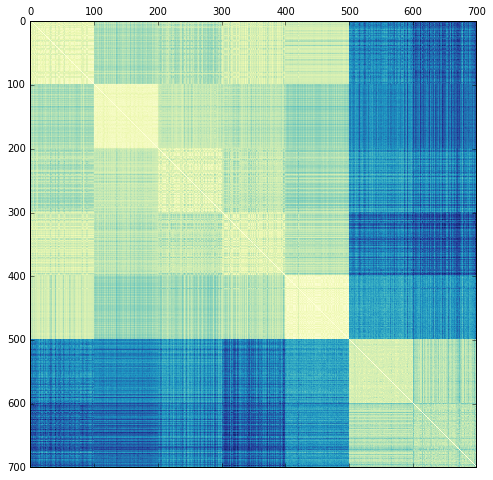

In [46]:
fig = plt.figure( figsize=(8,8))
ax1 = fig.add_subplot(111)
ax1.matshow( comb_diff, cmap=plt.cm.YlGnBu)

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


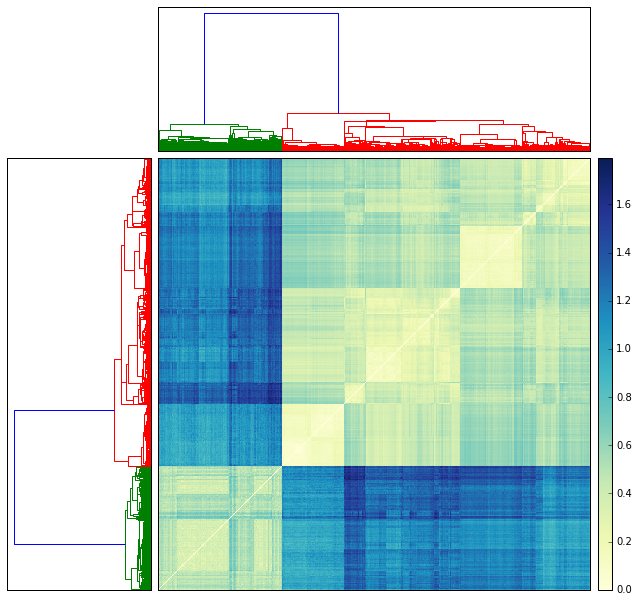

In [50]:
# Generate random features and distance matrix.

import scipy.cluster.hierarchy as sch
x = comb_diff
D = comb_diff.copy()
np.fill_diagonal( D, 0)#np.mean( br_diff))
# Compute and plot first dendrogram.
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_axes([0.09,0.1,0.2,0.6])
Y = sch.linkage(D, method='centroid')
Z1 = sch.dendrogram(Y, orientation='left')
ax1.set_xticks([])
ax1.set_yticks([])

# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Y = sch.linkage(D, method='centroid')
Z2 = sch.dendrogram(Y)
ax2.set_xticks([])
ax2.set_yticks([])

# Plot distance matrix.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=plt.cm.YlGnBu)
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
plt.colorbar(im, cax=axcolor)
fig.show()
fig.savefig('dendrogram.png')

In [51]:
runs = 100
which = np.array( ['none']*runs*7, dtype=str)
which[np.argwhere( np.transpose( idx1)<runs*7).ravel()] = 'pan2'
which[np.argwhere( np.transpose( idx1)<runs*6).ravel()] = 'pan1'

which[np.argwhere( np.transpose( idx1)<runs*5).ravel()] = 's3'
which[np.argwhere( np.transpose( idx1)<runs*4).ravel()] = 's1'
which[np.argwhere( np.transpose( idx1)<runs*3).ravel()] = 'm3'
which[np.argwhere( np.transpose( idx1)<runs*2).ravel()] = 'm2'
which[np.argwhere( np.transpose( idx1)<runs*1).ravel()] = 'm1'
which

array(['pan2', 'pan2', 'pan2', 'pan2', 'pan2', 'pan2', 'pan2', 'pan2',
       'pan2', 'pan2', 'pan2', 'pan2', 'pan2', 'pan2', 'pan2', 'pan2',
       'pan2', 'pan2', 'pan2', 'pan2', 'pan2', 'pan2', 'pan2', 'pan2',
       'pan2', 'pan2', 'pan2', 'pan2', 'pan2', 'pan2', 'pan2', 'pan1',
       'pan1', 'pan1', 'pan1', 'pan2', 'pan1', 'pan1', 'pan1', 'pan1',
       'pan1', 'pan1', 'pan1', 'pan1', 'pan1', 'pan1', 'pan1', 'pan1',
       'pan1', 'pan1', 'pan1', 'pan1', 'pan1', 'pan1', 'pan1', 'pan1',
       'pan1', 'pan1', 'pan1', 'pan1', 'pan1', 'pan1', 'pan1', 'pan1',
       'pan1', 'pan1', 'pan1', 'pan1', 'pan1', 'pan1', 'pan1', 'pan1',
       'pan1', 'pan1', 'pan1', 'pan1', 'pan1', 'pan1', 'pan1', 'pan1',
       'pan1', 'pan1', 'pan1', 'pan1', 'pan1', 'pan1', 'pan1', 'pan1',
       'pan1', 'pan1', 'pan1', 'pan1', 'pan1', 'pan1', 'pan1', 'pan1',
       'pan1', 'pan1', 'pan1', 'pan1', 'pan1', 'pan1', 'pan1', 'pan1',
       'pan1', 'pan1', 'pan1', 'pan1', 'pan1', 'pan1', 'pan1', 'pan1',
      